In [1]:
import numpy as np
import corner
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

linewidth =1.3
dpi=250

plt.rcParams.update({
'axes.labelsize': 16,
'axes.titlesize': 18,
'font.size': 12,
'legend.fontsize': 24,
'xtick.labelsize': 16,
'ytick.labelsize': 16,
"lines.linewidth": linewidth,
"lines.markersize": 2,
'xtick.major.pad':'1',
'ytick.major.pad':'1',
}
)


## Functions
def get_samples(data, parameters=['mc', 'eta'], zero_parameter=None):
    '''Function to generate numpy array with samples. Set zero_param to parameters which are not being sampled over, preventing range error in corner. 
    parameter list = [m1, m2, s1x, s1y, s1z, s2x, s2y, s2z, mc, eta, distance, mtot, q, chi_eff, chi_p, e, mpa, ra, dec, t]
    Note: mpa is the anomaly parameter the model takes in. Also, each intrinsic sample has 20 extrinsic samples associated with it.'''

    # collect samples in a numpy array
    final_samples = np.zeros((data.shape[0], len(parameters)))

    # loop over parameters
    for i, param in enumerate(parameters):
        # if a parameter is not sampled over, generate samples close to zero to prevent range plotting issues in corner
        if zero_parameter is not None:
            if param in zero_parameter:
                final_samples[:, i] = np.random.uniform(0, 0.000001, final_samples.shape[0])
                continue
        if param == 'm1':
            final_samples[:, i] = data[:, 0]
        if param == 'm2':
            final_samples[:, i] = data[:, 1]
        if param == 's1x':
            final_samples[:, i] = data[:, 2]
        if param == 's1y':
            final_samples[:, i] = data[:, 3]
        if param == 's1z':
            final_samples[:, i] = data[:, 4]
        if param == 's2x':
            final_samples[:, i] = data[:, 5]
        if param == 's2y':
            final_samples[:, i] = data[:, 6]
        if param == 's2z':
            final_samples[:, i] = data[:, 7]
        if param == 'mc':
            final_samples[:, i] = data[:, 8]
        if param == 'eta':
            final_samples[:, i] = data[:, 9]
        if param == 'distance':
            final_samples[:, i] = data[:, 16]
        if param == 'mtot':
            final_samples[:, i] = data[:, 22]
        if param == 'q':
            final_samples[:, i] = data[:, 23]
        if param == 'chi_eff':
            final_samples[:, i] = data[:, 24]
        if param == 'chi_p':
            final_samples[:, i] = data[:, 25]
        if param == 'e':
            final_samples[:, i] = data[:, -2]
        if param == 'mpa':
            final_samples[:, i] = data[:, -1]
        if param == 'ra':
            final_samples[:, i] = data[:, 10]
        if param == 'dec':
            final_samples[:, i] = data[:, 11]
        if param == 't':
            final_samples[:, i] = data[:, 12]
    return final_samples

def remove_from_axes(fig, axes=0):
    '''For plotting manipulation.'''
    ax=fig.get_axes()
    # remove all histogram bars
    for patch in list(ax[axes].patches):
        patch.remove()
    # remove all lines 
    for line in list(ax[axes].lines):
        line.remove()
    # also remove scatter plots or contours
    for collection in list(ax[axes].collections):
        collection.remove()
    # redraw the figure
    fig.canvas.draw()
    return fig, ax

def get_sample_statistics(file_data, parameters, zero_parameter=None):
    '''To print sample statistics.'''
    samples_here = get_samples(file_data, parameters, zero_parameter)
    for i, param in enumerate(parameters):
        lower, median, upper = np.percentile(samples_here[:,i], [5 ,50, 95])
        # lower, median, upper = np.percentile(samples_here[:,i], [0.5 ,50, 99.5])
        print(f'{param}: {median, upper-median, median-lower}')

# define paths
base_path = '/Users/aasim/Desktop/Papers/GW200105/run_results/GW200105_samples/'
# save_path = '/Users/aasim/Desktop/Papers/GW200105/plots'

save_path = base_path

print(f'Saving figures in {save_path}')


Saving figures in /Users/aasim/Desktop/Papers/GW200105/run_results/GW200105_samples/


# Load data

In [2]:
v5EHM_data = np.loadtxt(f'{base_path}/v5EHM_samples.dat')
v5PHM_data = np.loadtxt(f'{base_path}/v5PHM_samples.dat')

resumS_precessing_data = np.loadtxt(f'{base_path}/ResumS_precessing_samples.dat')
resumS_eccentric_data = np.loadtxt(f'{base_path}/ResumS_eccentric_samples.dat')
resumS_data = np.loadtxt(f'{base_path}/ResumS_samples_lmax4.dat')

# Plot corner (Fig. 1)

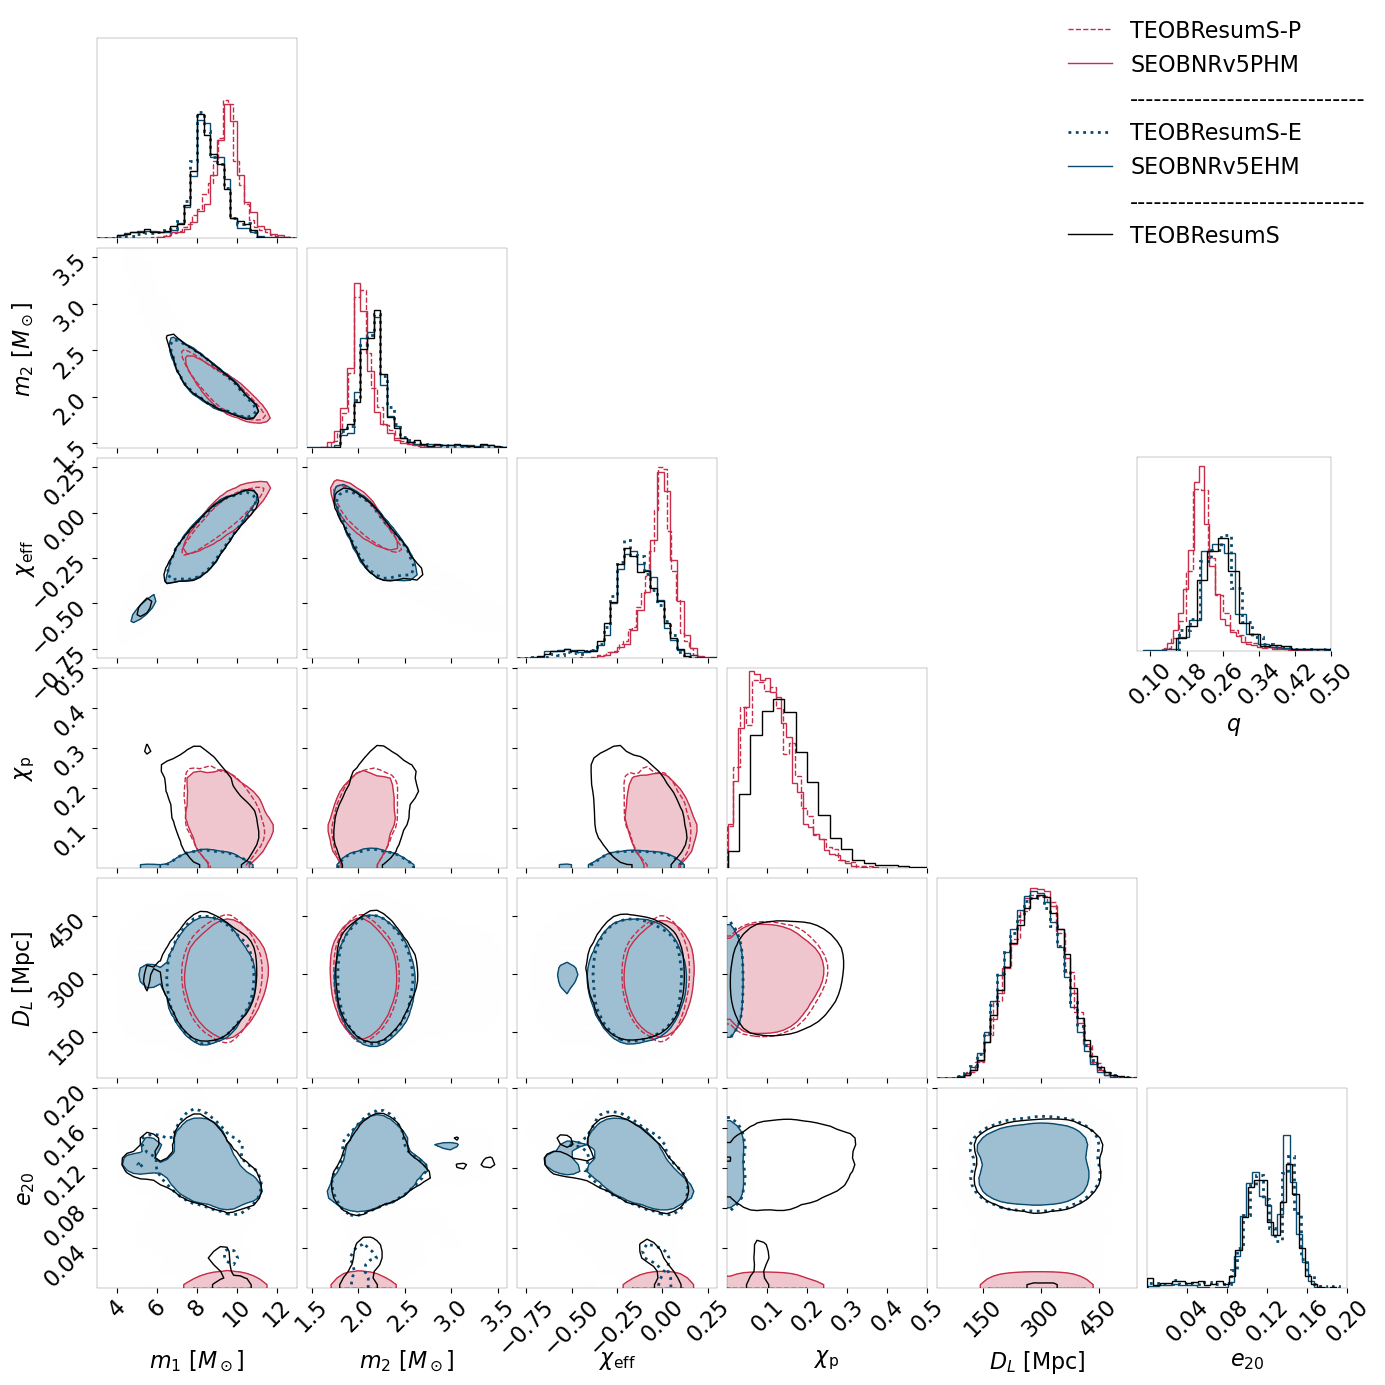

In [3]:
parameters = ['m1', 'm2', 'chi_eff', 'chi_p', 'distance', 'e']
labels = [r'$m_1~[M_\odot]$', r'$m_2~[M_\odot]$', r'$\chi_\mathrm{eff}$',  r'$\chi_\mathrm{p}$', r'$D_L~[\mathrm{Mpc}]$', r'$e_{20}$']
colors ={'v5EHM': "#084A6E", 'v5EHM-light': "#9EBFD1",'ResumS-eccentric': "#084A6E", 'ResumS':"black", 'v5PHM': "#C72C48", 'ResumS-precessing':"#C72C48", 'v5PHM-light':"#EFC6CE", 'TEHM': "#F7B320", 'GWSOC:PhenomXPHM':"#789D37"}

bins=30
smooth = 1.0

# remove 1-D eccentricity posterior for precessing only cases and vice versa
manipulate=True

linewidth = 1.0
linewidth_dashed = 1.0
linewidth_fill = 0.0
linewidth_resumSE = 2.0

# get precessing-only samples
v5PHM_samples = get_samples(v5PHM_data, parameters=parameters, zero_parameter=['e'])
ResumS_precessing_samples = get_samples(resumS_precessing_data, parameters=parameters, zero_parameter=['e'])

# get eccentric-only samples
v5EHM_samples = get_samples(v5EHM_data, parameters=parameters, zero_parameter=['chi_p'])
ResumS_eccentric_samples = get_samples(resumS_eccentric_data, parameters=parameters, zero_parameter=['chi_p'])

# get eccentric and precessing samples
ResumS_samples = get_samples(resumS_data, parameters=parameters)

# corner range for each parameter
range_array = [[3, 13.0], [1.45, 3.6], [-0.8, 0.3], [0.0, 0.5], [30, 550], [0.0, 0.2]]

# precessing-only
fig = corner.corner(ResumS_precessing_samples, color=colors['ResumS-precessing'], smooth=smooth, linestyle = '--', plot_density=False, plot_datapoints=False, levels=[0.9], contour_kwargs={'linewidths':linewidth_dashed, 'linestyles': '--',} , hist_kwargs={'density':True, 'linewidth':linewidth_dashed, 'linestyle': '--'}, bins=bins, labels=labels)
corner.corner(v5PHM_samples, color=colors['v5PHM'], smooth=smooth,range=range_array, plot_density=False,  plot_datapoints=False, levels=[0.9], contour_kwargs={'linewidths':linewidth} , hist_kwargs={'density':True, 'linewidth':linewidth}, bins=bins, fig=fig)
corner.corner(v5PHM_samples, color=colors['v5PHM-light'], smooth=smooth,range=range_array, plot_density=True, fill_contours=True,  plot_datapoints=False, levels=[0.9], contour_kwargs={'linewidths':linewidth_fill} , hist_kwargs={'density':True, 'linewidth':linewidth_fill}, bins=bins, fig=fig)

#  eccentric-only
corner.corner(ResumS_eccentric_samples, color=colors['ResumS-eccentric'], smooth=smooth, range=range_array, plot_density=True, plot_datapoints=False, levels=[0.9], no_fill_contours=True, contourf_kwargs={'alpha':0.0}, contour_kwargs={'linewidths':linewidth_resumSE, 'linestyles': ':'} , hist_kwargs={'density':True, 'linewidth':linewidth_resumSE, 'linestyle': ':'}, bins=bins, fig=fig)
corner.corner(v5EHM_samples, color=colors['v5EHM'], smooth=smooth,range=range_array, plot_density=False,  plot_datapoints=False, levels=[0.9], contour_kwargs={'linewidths':linewidth} , hist_kwargs={'density':True, 'linewidth':linewidth}, bins=bins, fig=fig)
corner.corner(v5EHM_samples, color=colors['v5EHM-light'],  smooth=smooth, range=range_array, plot_density=True, fill_contours=True,  plot_datapoints=False, levels=[0.9], contour_kwargs={'linewidths':linewidth_fill} , hist_kwargs={'density':True, 'linewidth':linewidth_fill}, bins=bins, fig=fig)

# eccentric and precessing
corner.corner(ResumS_samples, color=colors['ResumS'], smooth=smooth, range=range_array, plot_density=False,  plot_datapoints=False, levels=[0.9], contour_kwargs={'linewidths':linewidth} ,no_fill_contours=True, hist_kwargs={'density':True, 'linewidth':linewidth}, bins=bins, fig=fig)


# plot mass ratio separately (why are the bins size different?)
factor_bins = 1.2
newax = fig.add_axes([0.82, 0.530, 0.14, 0.14], anchor='NE', zorder=1)
newax.set_xlim([0.07, 0.5])
newax.set_yticks([])
newax.tick_params(axis='x', rotation=45)
newax.set_xlabel(r"$q$")
newax.hist(ResumS_precessing_samples[:, 1]/ResumS_precessing_samples[:, 0], color=colors['ResumS-precessing'],  bins=int(factor_bins*bins), histtype="step", linestyle = '--', linewidth=linewidth_dashed, density=True)
newax.hist(v5PHM_samples[:, 1]/v5PHM_samples[:, 0], color=colors['v5PHM'],  bins=int(factor_bins*bins),  histtype="step", linewidth=linewidth, density=True)

newax.hist(ResumS_eccentric_samples[:, 1]/ResumS_eccentric_samples[:, 0], color=colors['ResumS-eccentric'],  bins=int(factor_bins*bins),  histtype="step", linestyle = ':', linewidth=linewidth_resumSE, density=True)
newax.hist(v5EHM_samples[:, 1]/v5EHM_samples[:, 0], color=colors['v5EHM'],  bins=int(factor_bins*bins),  histtype="step", linewidth=linewidth, density=True)

newax.hist(ResumS_samples[:, 1]/ResumS_samples[:, 0], color=colors['ResumS'],  bins=int(factor_bins*bins),  histtype="step", linewidth=linewidth, density=True)
newax.set_xticks([0.1, 0.18, 0.26, 0.34, 0.42, 0.50])


# manipulate to remove zero range samples
if manipulate:

    # set y ranges on hist
    ax = fig.get_axes()
    ax[0].set_ylim([0,0.9])
    ax[7].set_ylim([0, 4.5])
    ax[14].set_ylim([0, 6.5])

    # cleaning up eccentricity hist
    fig, ax = remove_from_axes(fig, 35)
    ax[35].set_ylim([0,32])
    ax[35].hist(v5EHM_samples[:, 5], color=colors['v5EHM'], linewidth=linewidth, bins=bins, density=True, histtype = 'step')
    ax[35].hist(ResumS_eccentric_samples[:, 5], color=colors['ResumS-eccentric'], linestyle=':' ,linewidth=linewidth_resumSE, bins=bins, density=True, histtype = 'step')
    ax[35].hist(ResumS_samples[:, 5], color=colors['ResumS'],linewidth=linewidth, bins=bins, density=True, histtype = 'step')


    # cleaning up precession hist
    fig, ax=remove_from_axes(fig, 21)
    ax[21].set_ylim([0,6.8])
    ax[21].hist(ResumS_precessing_samples[:, 3], color=colors['ResumS-precessing'], linestyle = '--', linewidth=linewidth_dashed, bins=bins, density=True, histtype = 'step')
    ax[21].hist(v5PHM_samples[:, 3], color=colors['v5PHM'], linewidth=linewidth, bins=bins, density=True, histtype = 'step')
    ax[21].hist(ResumS_samples[:, 3], color=colors['ResumS'], linewidth=linewidth, bins=bins, density=True, histtype = 'step')

    # reduce the frame width
    for ax in fig.get_axes():
        for spine in ax.spines.values():
            spine.set_linewidth(0.15)  # Set to a smaller value (e.g., 0.5)


# legend
legend_elements = [
    Line2D([0], [0], color=colors['ResumS-precessing'], label='TEOBResumS-P', lw = linewidth_dashed, linestyle='--',),
    Line2D([0], [0], color=colors['v5PHM'], label='SEOBNRv5PHM', lw = linewidth),
    Patch(color='none', label='-----------------------------'),
    Line2D([0], [0], color=colors['ResumS-eccentric'], label='TEOBResumS-E', lw = linewidth_resumSE, linestyle=':',),
    Line2D([0], [0], color=colors['v5EHM'], label='SEOBNRv5EHM', lw = linewidth),
    Patch(color='none', label='-----------------------------'),
    Line2D([0], [0], color=colors['ResumS'], label='TEOBResumS', lw = linewidth),

]

fig.canvas.draw()
fig.legend(handles=legend_elements, loc='upper right', frameon=False, fontsize =16)
fig.savefig(f'{save_path}/comparative_corner.pdf', format='pdf', bbox_inches='tight', dpi=dpi)

# Print sample statistics

In [4]:
print('\n################### ResumS-P ###################\n')
get_sample_statistics(resumS_precessing_data, ['m1', 'm2', 'mtot', 'mc', 'q', 'chi_eff', 'chi_p', 'e', 'distance'],  zero_parameter=['e'] )
print('\n################### v5PHM ###################\n')
get_sample_statistics(v5PHM_data, ['m1', 'm2', 'mtot', 'mc', 'q', 'chi_eff', 'chi_p', 'e', 'distance'], zero_parameter=['e'] )


print('\n################### ResumS-E ###################\n')
get_sample_statistics(resumS_eccentric_data, ['m1', 'm2', 'mtot', 'mc', 'q', 'chi_eff', 'chi_p', 'e', 'distance'], zero_parameter=['chi_p'])
print('\n################### v5EHM ###################\n')
get_sample_statistics(v5EHM_data, ['m1', 'm2', 'mtot', 'mc', 'q', 'chi_eff', 'chi_p', 'e', 'distance'], zero_parameter=['chi_p'])


print('\n################### ResumS ###################\n')
get_sample_statistics(resumS_data, ['m1', 'm2', 'mtot', 'mc', 'q', 'chi_eff', 'chi_p', 'e', 'distance'])


################### ResumS-P ###################

m1: (9.423172, 1.2669820000000005, 1.7046989999999989)
m2: (2.0406928, 0.33829639999999994, 0.18162710000000004)
mtot: (11.463941599999998, 1.084898800000003, 1.3677985999999986)
mc: (3.6181304778574654, 0.0065076009298694615, 0.007902307425772914)
q: (0.21651475578522703, 0.09143262506330116, 0.042610695233807616)
chi_eff: (-0.013483975422993249, 0.10646614909927819, 0.1730413568073117)
chi_p: (0.10490489566123759, 0.12720651545402348, 0.08031507309481742)
e: (5.002697279993344e-07, 4.493037859952587e-07, 4.509450506011178e-07)
distance: (291.32818999999995, 111.60845899999993, 114.11016649999993)

################### v5PHM ###################

m1: (9.5174427, 1.4072712999999997, 1.6361413000000002)
m2: (2.0245619, 0.31592390000000004, 0.1952238850000001)
mtot: (11.54331925, 1.2103962500000005, 1.323308449999999)
mc: (3.61840514811586, 0.007242755588618088, 0.007831559339155802)
q: (0.21264877788620157, 0.08446205977303972, 0.04518572